<a href="https://colab.research.google.com/github/Ankit-521/Machine-Learning-Projects/blob/main/Cifar10_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# set tf 1.x for colab
%tensorflow_version 1.x

TensorFlow 1.x selected.


# Object Classification using CNN architecture


* Dataset CIFAR-10

It contains 32x32 color images from 10 classes: __airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck__:
<img src="https://github.com/hse-aml/intro-to-dl/blob/master/week3/images/cifar10.jpg?raw=1" style="width:80%">

In [ ]:
import tensorflow as tf
import keras
from keras import backend as K
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)

1.15.2
2.3.1


Using TensorFlow backend.


# Load dataset

In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


In [ ]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

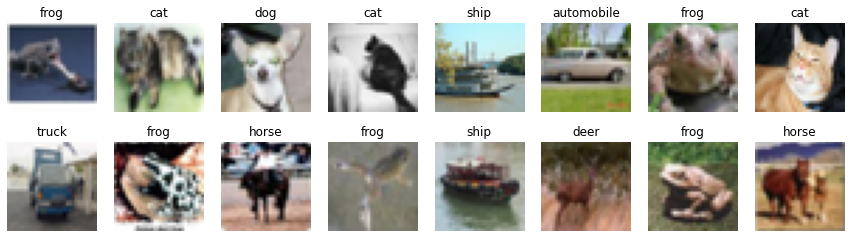

In [ ]:
# Random images from training Dataset
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_train[random_index, :])
        ax.set_title(cifar10_classes[y_train[random_index, 0]])
plt.show()

# Prepare data

Data Normalization for  inputs by using this formula: $$x_{norm} = \frac{x}{255} - 0.5$$

Then we convert class labels to one-hot encoded vectors.

In [ ]:
# Data Normalization
x_train_scaled =  x_train/255-0.5
x_test_scaled = x_test/255-0.5

# class labels to one-hot encoded
y_train_onehotencoded = keras.utils.to_categorical(y_train)
y_test_onehotencoded= keras.utils.to_categorical(y_test)

# CNN architecture for Model

In [ ]:
# Important fuctions
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU

Convolutional networks are built from several types of layers:
- [Conv2D](https://keras.io/layers/convolutional/#conv2d) - performs convolution:
    - **filters**: number of output channels; 
    - **kernel_size**: an integer or tuple/list of 2 integers, specifying the width and height of the 2D convolution window;
    - **padding**: padding="same" adds zero padding to the input, so that the output has the same width and height, padding='valid' performs convolution only in locations where kernel and the input fully overlap;
    - **activation**: "relu", "tanh", etc.
    - **input_shape**: shape of input.
- [MaxPooling2D](https://keras.io/layers/pooling/#maxpooling2d) - performs 2D max pooling.
- [Flatten](https://keras.io/layers/core/#flatten) - flattens the input, does not affect the batch size.
- [Dense](https://keras.io/layers/core/#dense) - fully-connected layer.
- [Activation](https://keras.io/layers/core/#activation) - applies an activation function.
- [LeakyReLU](https://keras.io/layers/advanced-activations/#leakyrelu) - applies leaky relu activation.
- [Dropout](https://keras.io/layers/core/#dropout) - applies dropout.

A model which takes (None,32, 32, 3) as  input and predicts (None,10) as output with probabilities for all classes. 

In [ ]:
def make_model():
    model = Sequential()

    model.add(Conv2D(filters=16,kernel_size=(3,3),strides=(1,1),padding='same',name='conv1',input_shape=(32,32,3)))
    model.add(LeakyReLU(0.1))

    model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='same',name='conv2'))
    model.add(LeakyReLU(0.1))

    model.add(MaxPooling2D((2,2),name='maxpool1'))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='same',name='conv3'))
    model.add(LeakyReLU(0.1))

    model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same',name='conv4'))
    model.add(LeakyReLU(0.1))

    model.add(MaxPooling2D((2,2),name='maxpool2'))
    model.add(Dropout(0.25, seed=0))

    model.add(Flatten())

    model.add(Dense(256,name='fullyconn1'))
    model.add(Dropout(0.25, seed=0))
    model.add(Dense(NUM_CLASSES,name='fullyconn2'))

    model.add(Activation('softmax'))
    
    return model

In [ ]:
# Model Description
tf.reset_default_graph()
model = make_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 32, 32, 16)        448       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 16)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
maxpool1 (MaxPooling2D)      (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 16, 16, 32)       

In [ ]:
tf.reset_default_graph()
var = tf.Variable(0)
with tf.Session() as session:
  session.run(tf.global_variables_initializer())
  print(len(session.graph._nodes_by_name.keys()))

5


# Train model

In [ ]:
INIT_LR = 5e-3  # initial learning rate
BATCH_SIZE = 32
EPOCHS = 10
model = make_model()  # define our model

# model fitting (loss, optimizer, etc)
model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.adamax(lr=INIT_LR),metrics=['accuracy'])

# scheduler of learning rate (decay with epochs)
def lr_scheduler(epoch):
    return INIT_LR * 0.9 ** epoch

# callback for printing of actual learning rate used by optimizer
class LrHistory(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs={}):
        print("Learning rate:", K.get_value(model.optimizer.lr))

Training takes approximately **1.5 hours**. You're aiming for ~0.80 validation accuracy.

In [ ]:
# we will save model checkpoints to continue training in case of kernel death
model_filename = 'cifar.{0:03d}.hdf5'
last_finished_epoch = None

#### uncomment below to continue training from model checkpoint
#### fill `last_finished_epoch` with your latest finished epoch
# from keras.models import load_model
# s = reset_tf_session()
# last_finished_epoch = 7
# model = load_model(model_filename.format(last_finished_epoch))

In [ ]:
# fit model
model.fit(
    x_train_scaled, y_train_onehotencoded,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[keras.callbacks.LearningRateScheduler(lr_scheduler), 
               LrHistory()],
    validation_data=(x_test_scaled, y_test_onehotencoded),
    shuffle=True
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
Learning rate: 0.005
50000/50000 [==============================] - 10s 206us/step - loss: 0.6857 - accuracy: 0.7615 - val_loss: 0.8216 - val_accuracy: 0.7324
Epoch 2/10
Learning rate: 0.0045
50000/50000 [==============================] - 10s 204us/step - loss: 0.6557 - accuracy: 0.7742 - val_loss: 0.7172 - val_accuracy: 0.7563
Epoch 3/10
Learning rate: 0.00405
50000/50000 [==============================] - 10s 207us/step - loss: 0.6236 - accuracy: 0.7820 - val_loss: 0.6868 - val_accuracy: 0.7727
Epoch 4/10
Learning rate: 0.003645
50000/50000 [==============================] - 10s 206us/step - loss: 0.5946 - accuracy: 0.7920 - val_loss: 0.6677 - val_accuracy: 0.7768
Epoch 5/10
Learning rate: 0.0032805
50000/50000 [==============================] - 10s 204us/step - loss: 0.5585 - accuracy: 0.8040 - val_loss: 0.6627 - val_accuracy: 0.7827
Epoch 6/10
Learning rate: 0.00295245
50000/50000 [==============================] - 10s 20

In [ ]:
# save weights to file
model.save_weights("weights.h5")

In [ ]:
# load weights from file (can call without model.fit)
model.load_weights("weights.h5")

# Evaluate model

In [ ]:
# make test predictions
y_pred_test = model.predict_proba(x_test_scaled)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

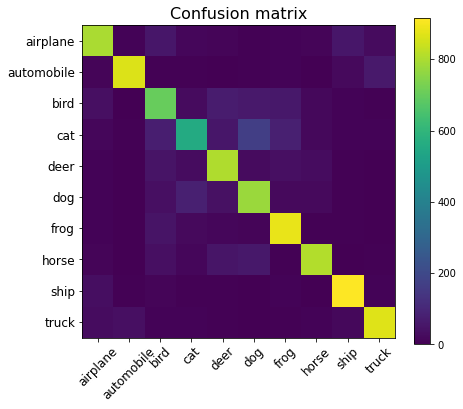

Test accuracy: 0.7987


In [ ]:
# confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_pred_test_classes))
plt.xticks(np.arange(10), cifar10_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), cifar10_classes, fontsize=12)
plt.colorbar()
plt.show()
print("Test accuracy:", accuracy_score(y_test, y_pred_test_classes))

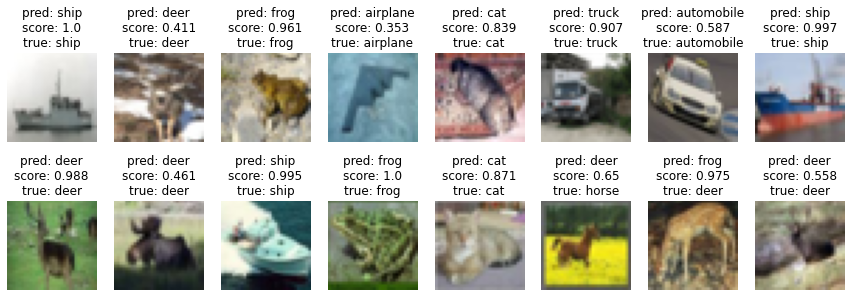

In [ ]:
# inspect preditions
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index, :])
        pred_label = cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[y_test[random_index, 0]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()